In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas

In [35]:
affairs = sm.datasets.fair.load_pandas().data


In [36]:
affairs.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [38]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [41]:
res1 = smf.ols(formula='yrs_married ~ C(religious)', data= affairs).fit()

In [42]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:            yrs_married   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     39.44
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           3.02e-25
Time:                        16:37:11   Log-Likelihood:                -21611.
No. Observations:                6366   AIC:                         4.323e+04
Df Residuals:                    6362   BIC:                         4.326e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.4398    

In [43]:
res2 = smf.ols(formula='yrs_married ~ affairs * age', data=affairs).fit()

In [44]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:            yrs_married   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     8470.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:38:34   Log-Likelihood:                -16551.
No. Observations:                6366   AIC:                         3.311e+04
Df Residuals:                    6362   BIC:                         3.314e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -18.7553      0.187   -100.230      

In [47]:
res3 = smf.ols(formula='yrs_married ~ np.exp(affairs)', data=affairs).fit()

In [48]:
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:            yrs_married   R-squared:                      -1.532
Model:                            OLS   Adj. R-squared:                 -1.532
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 18 Apr 2025   Prob (F-statistic):                nan
Time:                        16:43:02   Log-Likelihood:                -24627.
No. Observations:                6366   AIC:                         4.926e+04
Df Residuals:                    6365   BIC:                         4.926e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.329e-50   1.08e-49     

In [52]:
res4 = res2 = smf.ols(formula='yrs_married ~ affairs + age', data=affairs).fit()

In [53]:
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:            yrs_married   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:48:32   Log-Likelihood:                -16556.
No. Observations:                6366   AIC:                         3.312e+04
Df Residuals:                    6363   BIC:                         3.314e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5967      0.181   -102.945      0.0

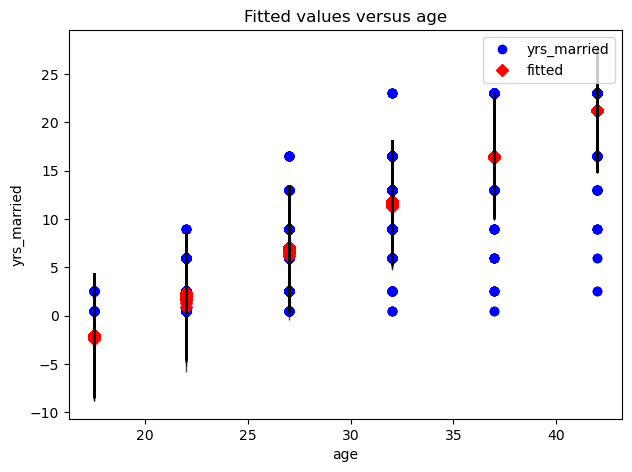

In [55]:
fig = sm.graphics.plot_fit(res4, "age")
fig.tight_layout(pad=1.0)